<a href="https://colab.research.google.com/github/mpfoster/Biochem5721/blob/master/binding%2Bplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common functions for 1:1 binding reactions
MPF 2023-10-10

## Hyperbolic
For the reaction $P+L\rightleftharpoons PL$, given total concentrations of P and L, and a dissociation constant $$K_D=\frac{[P][L]}{[PL]}$$

The fraction bound is:
$$Y = \frac{[PL]}{[P]+[PL]} = \frac{1}{\frac{[P]}{[PL]} + 1}= \frac{1}{\frac{K_D}{[L]} + 1}=\frac{[L]}{K_D+[L]}$$



## Quadratic
For the reaction $P+L\rightleftharpoons PL$, given total concentrations of P and L, and a dissociation constant $K_D$.

Fraction bound is computed from $$K_D = \frac{[P][L]}{[PL}=\frac{([P_{tot}]-[PL])([L_{tot}]-[PL])}{[PL]}$$
using the solution of the quadratic $$x=\frac{-b-\sqrt{b^2-4ac}}{2a}$$
with $x=[PL]$:
$$[PL] = \frac{[P_{tot}]+[L_{tot}]+K_D-\sqrt{([P_{tot}]+[L_{tot}]+K_D)^2-4[P_{tot}][L_{tot}]}}{2}$$

Fraction bound: $$Y=\frac{[PL]}{[P_{tot}]}$$

In [ ]:
# Quadratic
# x = (-b ± sqrt(b^2-4ac))/2a
def quadratic(c_L, c_P, Kd):
  a = 1
  b = c_L + c_P + Kd
  c = c_L * c_P
  return (b - (b**2-4*a*c)**0.5)/2/a

c_L = 1e-6 # M ligand
c_P = 1e-6 # M protein
Kd = 1e-6 # M
Y = quadratic(c_L, c_P, Kd)/c_P
print("Fraction bound Y = %.2f" % Y)

Fraction bound Y = 0.38


## Solver
If we didn't know the analytical form of the equation, we could in principle us the `sympy` solver.

In [ ]:
# Let's use the solver
# Need sympy library; if not installed, uncomment this next line
# !pip install sympy
from sympy import solve
from sympy.abc import x,y,a,b,c

# Solver assumes polynomial is written as f = 0
# Kd = (c_p-x)(c_a-x)/x; (c_p-x)(cA_-x)/x - Kd = 0
# we will use a for c_a; b for c_p and c for Kd
solve((a-x)*(b-x)/x - c, x)

[a/2 + b/2 + c/2 - sqrt(a**2 - 2*a*b + 2*a*c + b**2 + 2*b*c + c**2)/2,
 a/2 + b/2 + c/2 + sqrt(a**2 - 2*a*b + 2*a*c + b**2 + 2*b*c + c**2)/2]

In [ ]:
# only the first of these solutions yields physically realistic numbers
# we can provide values for total concentrations and K, and compute/predict fractional binding:
a = 1e-5 # c_A /M Ligand
b = 1e-6 # c_P /M Protein
c = 1e-6 # Kd /M
sol = solve((a-x)*(b-x)/x - c, x)
print("Fraction bound = %.2f" % (sol[0]/b))

Fraction bound = 0.90


# Plots
It can be instructive to plot relationship between concentrations and fraction bound:

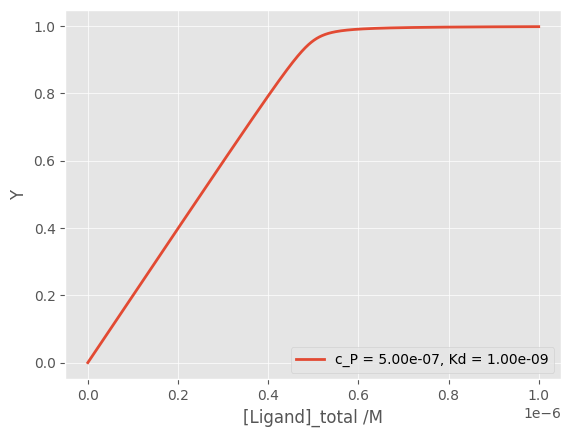

In [ ]:
# Let's make some plots
# quadratic
# need x values
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1e-6, 1000)
# c_L = 1e-6 # M ligand
c_P = 5e-7 # M protein
Kd = 1e-9 # M
y = quadratic(x, c_P, Kd)/c_P

plt.style.use('ggplot')
fig,ax = plt.subplots()
ax.plot(x,y, label = "c_P = %.2e, Kd = %.2e" % (c_P, Kd))
ax.legend()
ax.set_xlabel('[Ligand]_total /M')
ax.set_ylabel('Y')
fig.show()

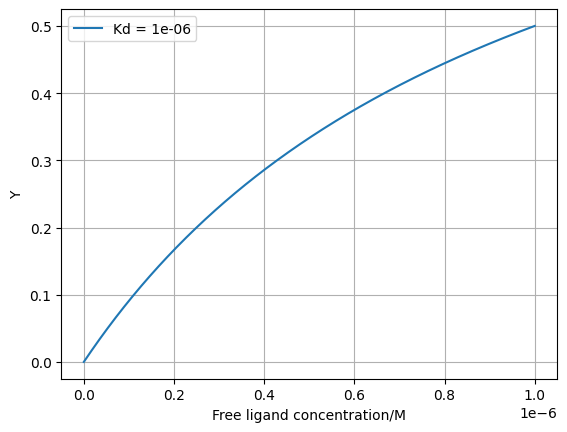

In [ ]:
# hyperbolic
def hyperbolic(x,Kd):
  return x/(x+Kd)

Kd = 1e-6
y2 = hyperbolic(x,Kd)

plt.style.use('default')
fig,ax = plt.subplots()
ax.plot(x,y2, label = "Kd = %.e" % Kd)
ax.legend()
ax.set_xlabel('Free ligand concentration/M')
ax.set_ylabel('Y')
ax.grid(True)
fig.show()

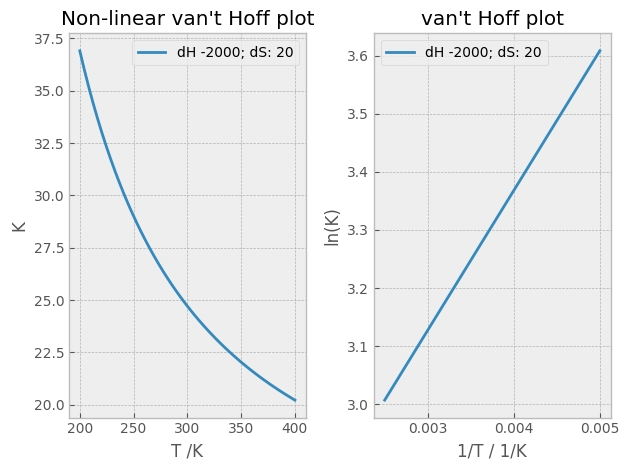

In [ ]:
# Van't Hoff:
# dG = -RT ln K = dH - TdS
# K = exp(-(dH-TdS)/RT) = exp(-dH/T + dS/R))
def ulvanthoff(T,dH,dS):
  K = np.exp(-dH/T/R + dS/R)
  return K

dS = 20
dH = -2e3
R = 8.314
T = np.linspace(200,400)
K = ulvanthoff(T,dH,dS)

plt.style.use('bmh')
fig,ax = plt.subplots(1,2)

ax[0].plot(T,K, label= 'dH %.f; dS: %.f' % (dH, dS))
ax[0].set_title('Non-linear van\'t Hoff plot')
ax[0].set_xlabel('T /K')
ax[0].set_ylabel('K')
ax[0].legend()

ax[1].plot(1/T,np.log(K), label='dH %.f; dS: %.f' % (dH, dS))
ax[1].set_title('van\'t Hoff plot')
ax[1].set_xlabel('1/T / 1/K')
ax[1].set_ylabel('ln(K)')
ax[1].legend()

plt.tight_layout()

fig.show()